In [2]:
import analyzer
import columns
import devices
import plots
import prints
prints.clearing_script()

device_type: str = 'kiv'
devices.kiv.work_file = prints.work_file_picking(device_type)

Доступен 1 файл для анализа: 
Файл № 1. MeasJ a284 #572665920 30-12-2022.xlsx
Данный файл выбран для анализа


In [3]:

print('Чтение и обработка файла...')
# __ Correct method
data = analyzer.get_data(device_type=device_type)
cols_list = columns.columns_list_maker(device_type=device_type, data=data)
cols = columns.columns_analyzer(device_type=device_type, list_for_columns=cols_list)
data = analyzer.pass_the_nan(device_type=device_type, data=data, cols=cols)
# __ Quick method for debugging
# noinspection PyTypeChecker
# devices.Pkl.save(device_type=device_type, data=data)
# noinspection PyTypeChecker
# data = devices.Pkl.load(device_type=device_type)
# cols_list = columns.columns_list_maker(device_type=device_type, data=data)
# cols = columns.columns_analyzer(device_type=device_type, list_for_columns=cols_list)
del cols_list
print('Обработка файла завершена')

Чтение и обработка файла...
Обработка файла завершена


In [4]:
data_slices = analyzer.values_time_slicer(device_type=device_type, data=data)
data = analyzer.values_time_slicer_choose(sliced_dict=data_slices)

По заданным параметрам найдено 3 среза данных
Срез данных № 1. Всего 19845 записей с 12.11.20 20:21 по 26.11.20 15:05
Срез данных № 2. Всего 311 записей с 19.12.22 12:04 по 19.12.22 17:13
Срез данных № 3. Всего 10160 записей с 23.12.22 16:35 по 30.12.22 17:57
Вы выбрали срез данных № 1. Всего 19845 записей с 12.11.20 20:21 по 26.11.20 15:05


In [5]:
prints.total_log_counter(device_type=device_type, data=data)



          Подсчёт общего количества записей...
Общее число записей в журнале измерений составило 19845


In [6]:
prints.values_time_analyzer_df(device_type=device_type, data=data)




          Анализ периодичности и неразрывности измерений...
Периоды измерений не нарушены


In [7]:
prints.total_nan_counter_df(device_type=device_type, data=data, cols=cols)  # optimize




          Анализ периодов массовой некорректности измерений...

 Выявлено 470 замеров с некорректными данными
Замеры с некорректными данными составили 2.4% от общего числа произведённых замеров
           Дата  Время  \
19375  26.11.20  07.16   
19376  26.11.20  07.17   
19377  26.11.20  07.18   
19378  26.11.20  07.19   
19379  26.11.20  07.20   
...         ...    ...   
19840  26.11.20  15.01   
19841  26.11.20  15.02   
19842  26.11.20  15.03   
19843  26.11.20  15.04   
19844  26.11.20  15.05   

       % некорректных данных (из общего числа считываемых) в момент замера  
19375                                               39.0                    
19376                                               39.0                    
19377                                               39.0                    
19378                                               39.0                    
19379                                               39.0                    
...                          

In [8]:

ex1 = '∆C_MV'
ex2 = '∆tg_MV'

In [9]:
prints.info('Анализ трендов стороны СН')



          Анализ трендов стороны СН...


Анализ корреляции данных ∆C_MV, ∆tg_MV от температуры воздуха (при корреляции изменения на графике синхронны)


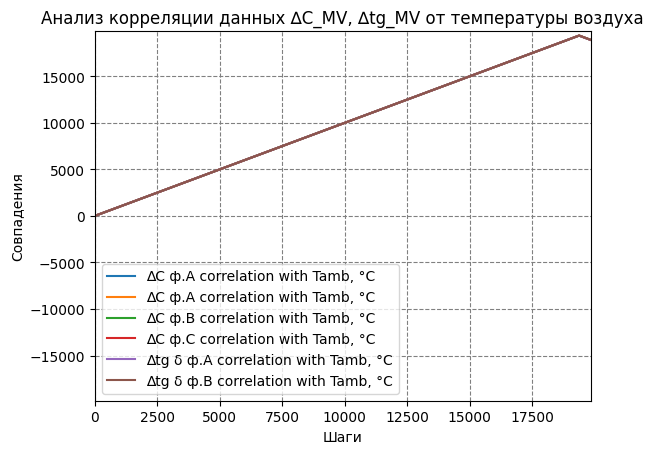

In [10]:
print(f'Анализ корреляции данных {ex1}, {ex2} от температуры воздуха (при корреляции изменения на графике синхронны)')
plots.correlation_plot(filter_list1=[ex1, ex2], filter_list2=['tair'], device_type=device_type, data=data, cols=cols,
                       title=f"Анализ корреляции данных {ex1}, {ex2} от температуры воздуха")


Среднее значение по ∆C_MV: 
Среднее по модулю по ∆C ф.A составило 0.576
Среднее по модулю по ∆C ф.B составило 0.563
Среднее по модулю по ∆C ф.C составило 0.593
Распределение значений ∆C_MV (гистограмма): 


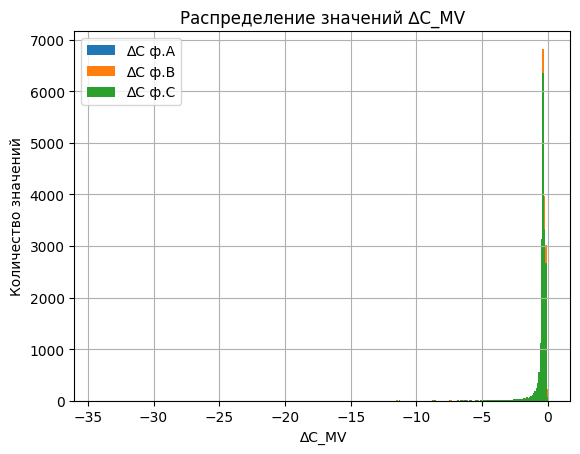

In [11]:
prints.average_printer(ex=ex1, data=data, cols=cols, abs_parameter=True)


Среднее значение по ∆tg_MV: 
Среднее по модулю по ∆tg δ ф.A составило 0.041
Среднее по модулю по ∆tg δ ф.B составило 0.041
Среднее по модулю по ∆tg δ ф.C составило 0.046
Распределение значений ∆tg_MV (гистограмма): 


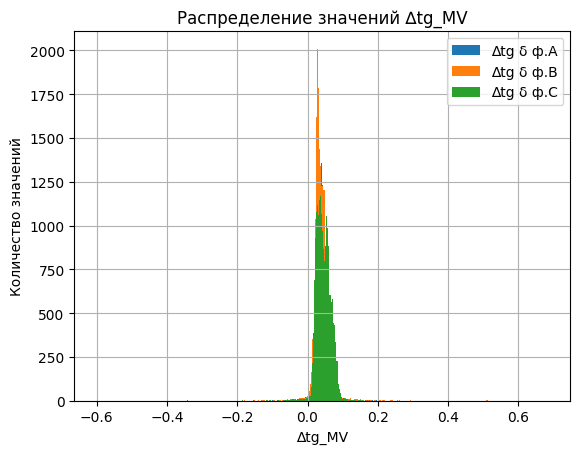

In [12]:
prints.average_printer(ex=ex2, data=data, cols=cols, abs_parameter=True)


In [13]:
prints.info('Анализ аварийной сигнализации')




          Анализ аварийной сигнализации...


In [14]:
ex = '∆tg_MV'

In [15]:
filter_list = ['time', '∆tg']

In [16]:
prints.info('Анализ сигнализации со стороны ВН')
w1 = 0.35
w2 = 0.5



          Анализ сигнализации со стороны ВН...


In [17]:
print(f'\nПревышение уровней {ex} для срабатывания предупредительной (±{w1}) или аварийной (±{w2}) сигнализации: \r')
status = prints.answering('\n Вывести в кратком виде? Краткий вид - это только срабатывания аварийной сигнализации'
                          ' (без предупредительной)', yes='y', no='n')
if status == 'y':
    prints.warning_printer(filter_list, device_type, data, cols, w1, w2, 'accident')
elif status == 'n':
    prints.warning_printer(filter_list, device_type, data, cols, w1, w2, 'warning')
    prints.warning_printer(filter_list, device_type, data, cols, w1, w2, 'accident')


Превышение уровней ∆tg_MV для срабатывания предупредительной (±0.35) или аварийной (±0.5) сигнализации: 
Выявлено 1 превышение (±0.5):уровней ∆tg δ ф.A для срабатывания аварийной сигнализации. 
 Процент срабатывания 0.005% (от общего количества замеров
      Дата/Время UTC+03:00  ∆tg δ ф.A
21676  2020-11-19 02:42:41     0.5317
Выявлено 5 превышений (±0.5):уровней ∆tg δ ф.B для срабатывания аварийной сигнализации. 
 Процент срабатывания 0.025% (от общего количества замеров
      Дата/Время UTC+03:00  ∆tg δ ф.B
30270  2020-11-13 03:28:42     0.6843
23972  2020-11-17 12:26:42     0.5117
19115  2020-11-20 21:23:42     0.5110
13124  2020-11-25 01:14:42     0.5706
11592  2020-11-26 02:46:42     0.6123
Выявлено 1 превышение (±0.5):уровней ∆tg δ ф.C для срабатывания аварийной сигнализации. 
 Процент срабатывания 0.005% (от общего количества замеров
      Дата/Время UTC+03:00  ∆tg δ ф.C
11592  2020-11-26 02:46:42    -0.5995


In [18]:
ex = '∆C_MV'
filter_list = ['time', '∆C']
prints.info('Анализ сигнализации со стороны ВН')
w1 = 0.35
w2 = 0.5



          Анализ сигнализации со стороны ВН...




          Графики изменения значений напряжений в фазах А, В и С стороны СН-110кВ...


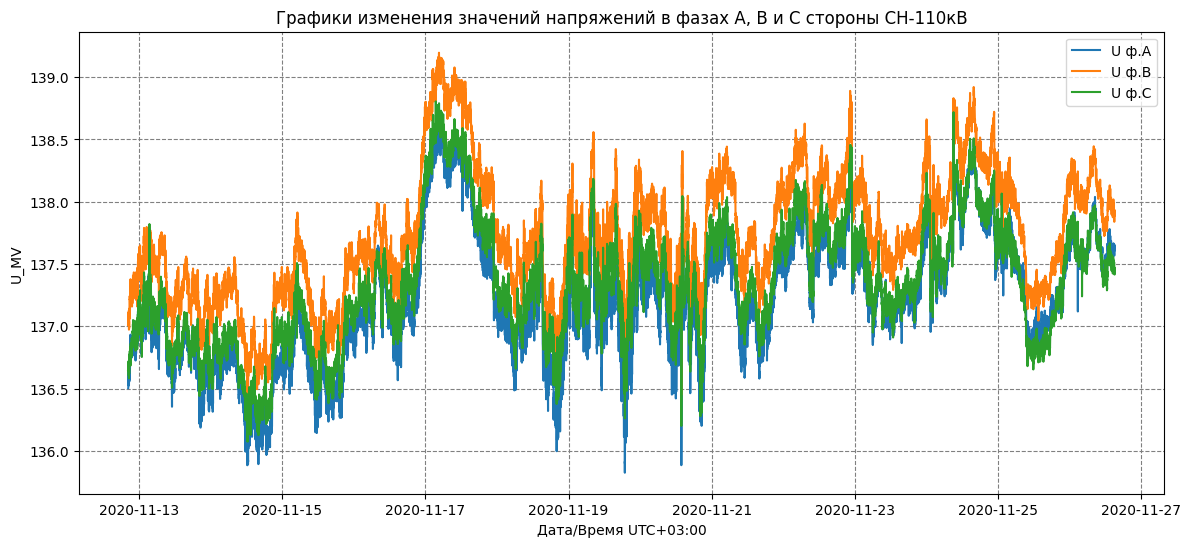

In [19]:

mv1 = 'Графики изменения значений напряжений в фазах А, В и С стороны СН-110кВ'
prints.print_flat_graph(input_y=['U_MV'], device_type=device_type, data=data, cols=cols, title=mv1)




          Графики изменения активной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны СН-110кВ...


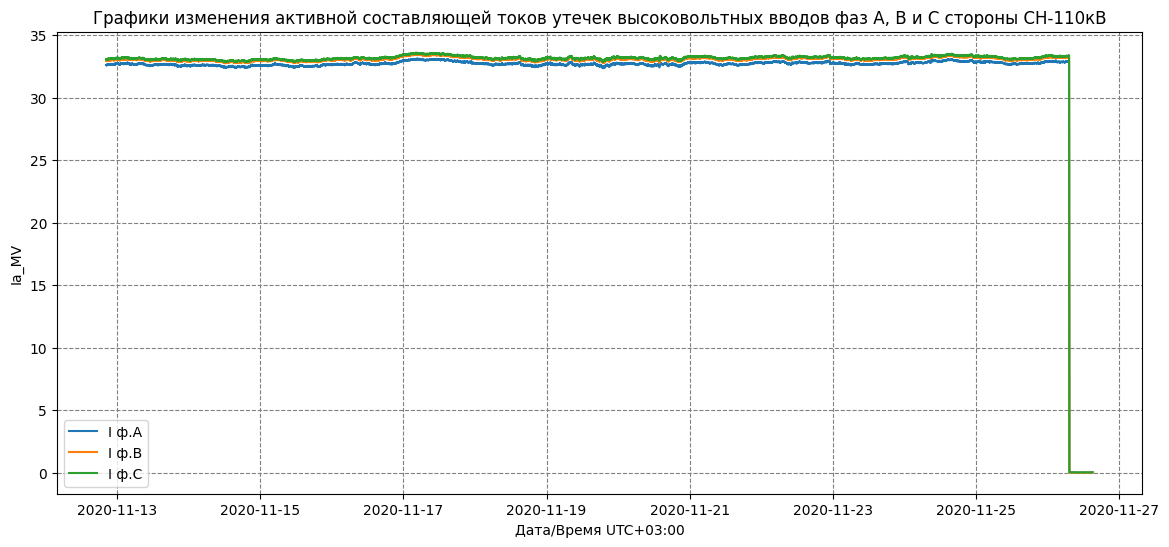

In [20]:

mv2 = 'Графики изменения активной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны СН-110кВ'
prints.print_flat_graph(input_y=['Ia_MV'], device_type=device_type, data=data, cols=cols, title=mv2)




          Графики изменения значений tgδ высоковольтных вводов фаз А, В и С стороны СН-110кВ...


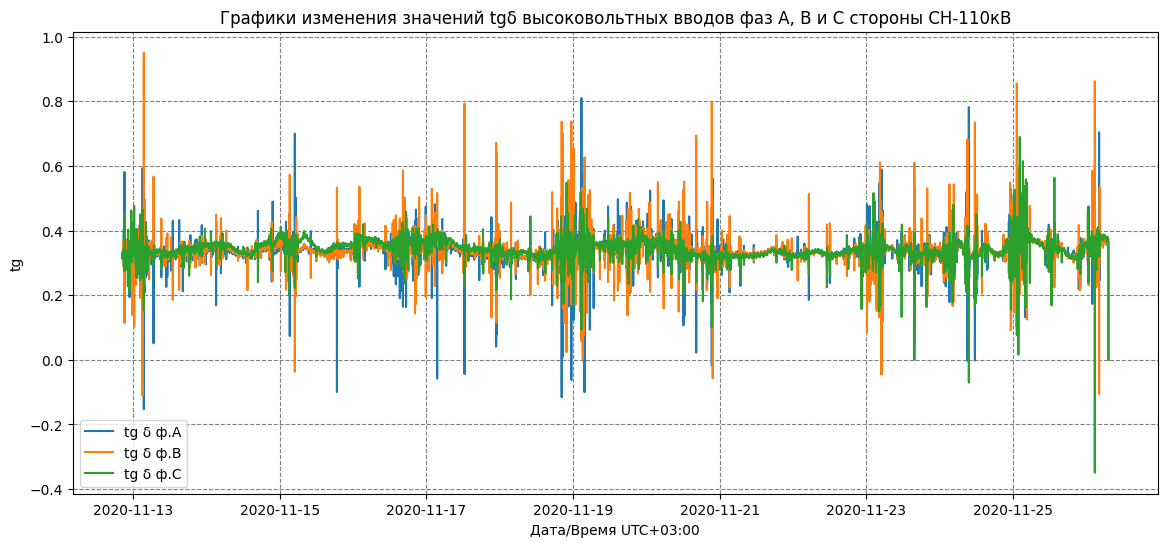

In [21]:

mv4 = 'Графики изменения значений tgδ высоковольтных вводов фаз А, В и С стороны СН-110кВ'
prints.print_flat_graph(input_y=['tg'], device_type=device_type, data=data, cols=cols, title=mv4)




          Графики изменения значений емкостей С1 высоковольтных вводов фаз А, В и С стороны СН-110кВ...


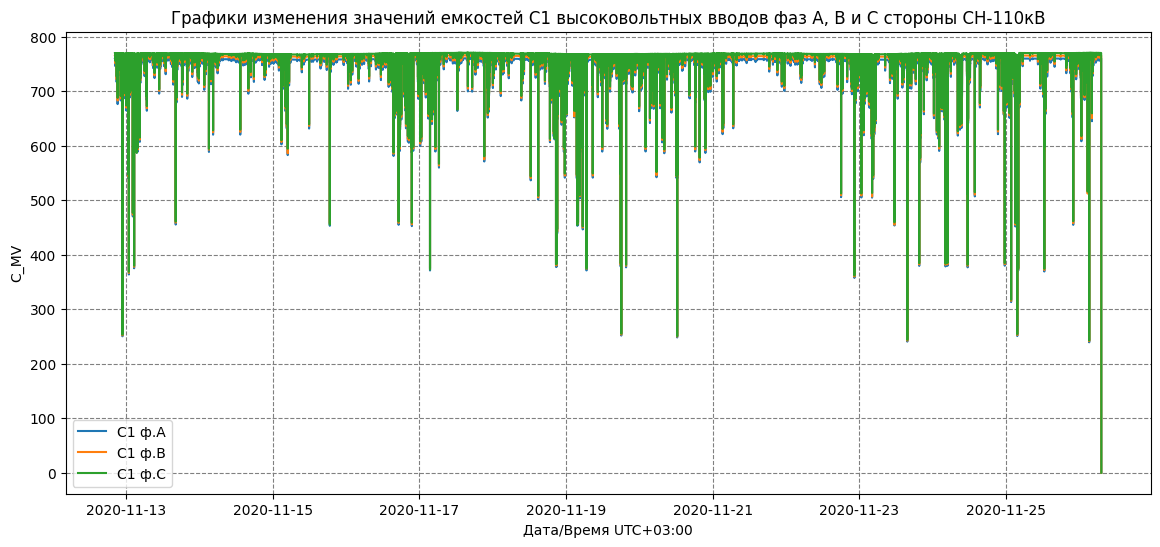

In [22]:

mv5 = 'Графики изменения значений емкостей С1 высоковольтных вводов фаз А, В и С стороны СН-110кВ'
prints.print_flat_graph(input_y=['C_MV'], device_type=device_type, data=data, cols=cols, title=mv5)




          Графики изменения значений ∆tgδ (изменение tgδ относительно начальных значений) высоковольтных вводов фаз А, В и С стороны СН-110кВ...


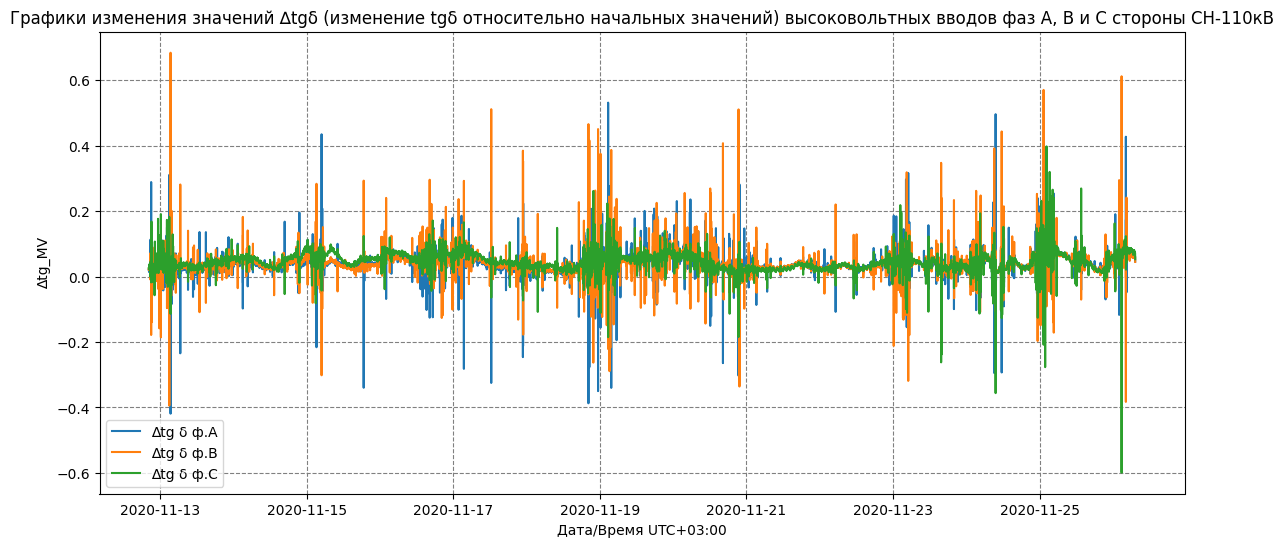

In [23]:

mv6 = 'Графики изменения значений ∆tgδ (изменение tgδ относительно начальных значений) высоковольтных вводов' \
      ' фаз А, В и С стороны СН-110кВ'
prints.print_flat_graph(input_y=['∆tg_MV'], device_type=device_type, data=data, cols=cols, title=mv6)




          Графики изменения значений ∆C/C1 (изменение емкостей С1 относительно начальных значений) высоковольтных вводов фаз А, В и С стороны СН-110кВ...


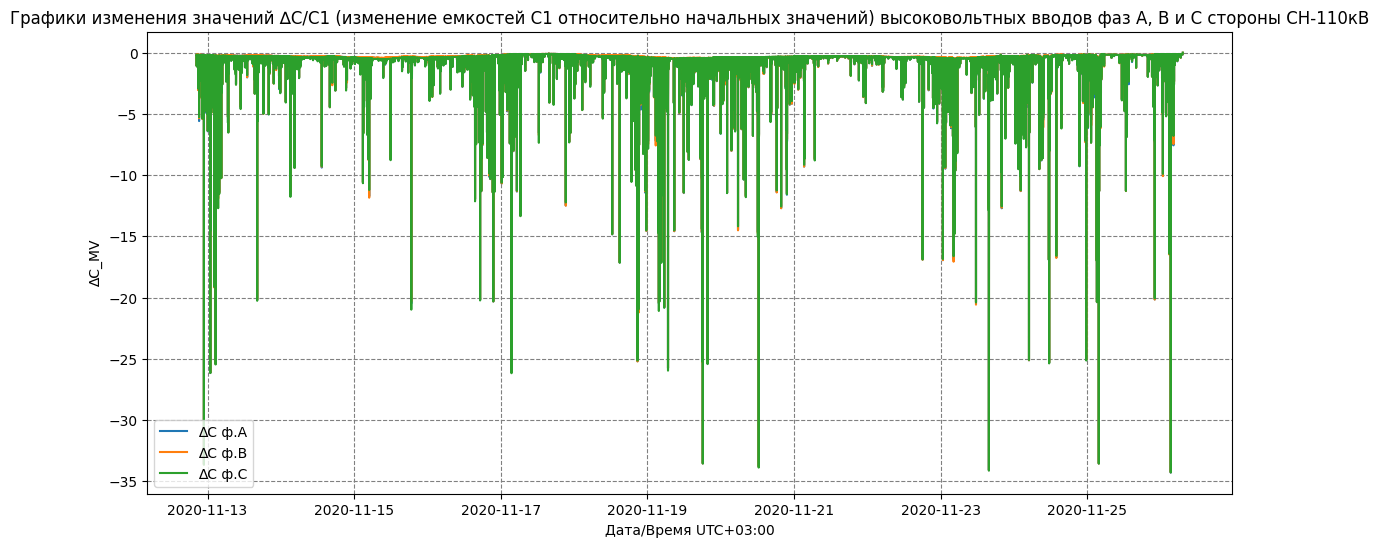

In [24]:

mv7 = 'Графики изменения значений ∆C/C1 (изменение емкостей С1 относительно начальных значений) высоковольтных вводов' \
      ' фаз А, В и С стороны СН-110кВ'
prints.print_flat_graph(input_y=['∆C_MV'], device_type=device_type, data=data, cols=cols, title=mv7)




          None...


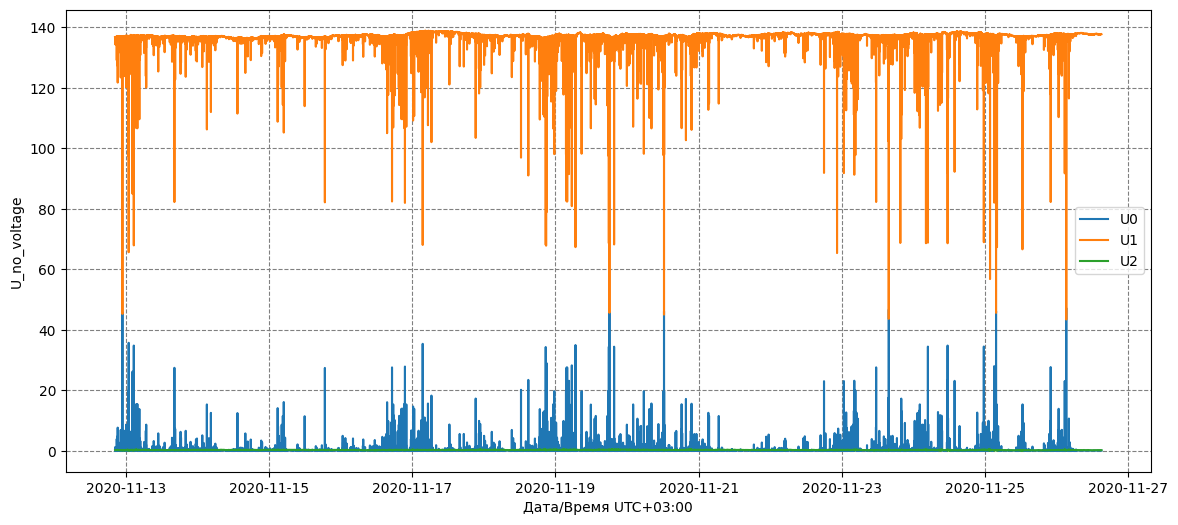

In [25]:
prints.print_flat_graph(input_y=['U_no_voltage'], device_type=device_type, data=data, cols=cols)



          None...


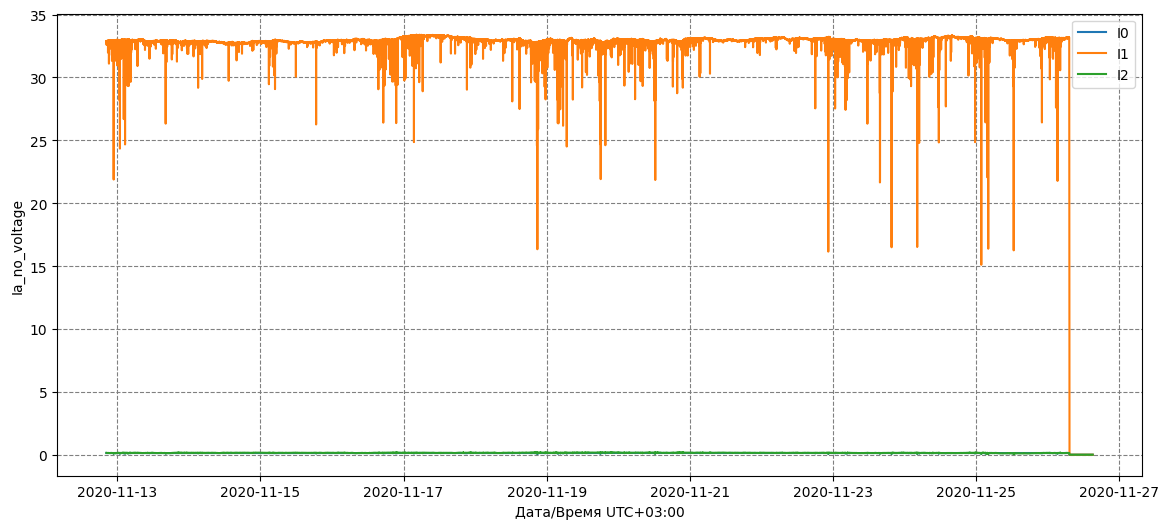

In [26]:
prints.print_flat_graph(input_y=['Ia_no_voltage'], device_type=device_type, data=data, cols=cols)